In [1]:
import networkx as nx
""" I am using a modified networkx version, to support weighted global efficiency"""
import load_connectivity 
import copy

import matplotlib
import graphing

matplotlib.rcParams['figure.figsize'] = [15,5]

print nx.__version__

2.0.dev_20170208144735


In [21]:
network = load_connectivity.load_2015_connectivity_matrix()

weight_measure = 'distance' # can be weight or distance(1/weight)

global_efficiency = {"complete":nx.global_efficiency(network.to_undirected(),weight=weight_measure) }
vulnerability = {}

for node in list(network.nodes()):
    tmp_network = copy.deepcopy(network)
    tmp_network.remove_node(node)
    global_efficiency[node] = nx.global_efficiency(tmp_network.to_undirected(),weight=weight_measure)
    vulnerability[node] = -( global_efficiency[node] - global_efficiency["complete"]) / global_efficiency["complete"]



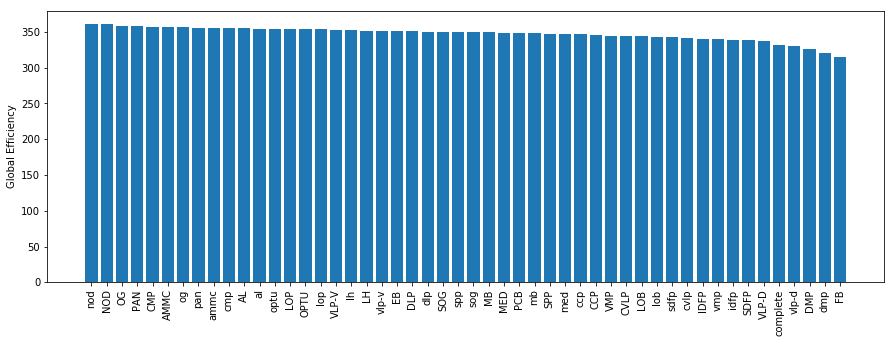

In [22]:
graphing.plot_measurement(global_efficiency ,network.nodes(),"Global Efficiency")

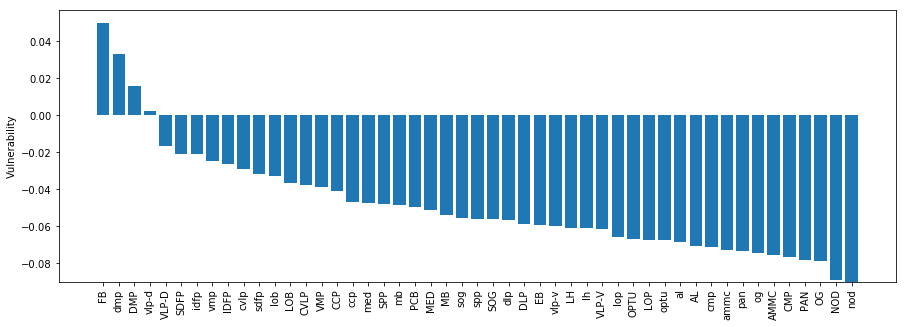

In [23]:
graphing.plot_measurement(vulnerability ,network.nodes(),"Vulnerability")